In [1]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pymysql import connect
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
database =connect(host = 'localhost', 
                  user = 'root',
                  password = 'Ceaservyshu7&',
                  database = 'capstone_project')

In [4]:
cur = database.cursor()

In [5]:
query = 'SELECT * FROM education_loan_dti;'

cur.execute(query)

422

In [6]:
df = pd.read_sql(query, database)

C:\Users\vyshn\AppData\Local\Temp\ipykernel_37236\305042412.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, database)


In [7]:
# Calculate the remaining salary
df['Remaining_Salary'] = df['MonthlySalary'] - df['monthly_obligations']

# Drop rows where the remaining salary is negative and the applicant is unemployed and the loan is approved
df = df[~((df['Remaining_Salary'] < 0) & (df['approval_status'] == 'Approved') & (df['employment_type'] == 'Unemployed'))]

# Drop rows where the employment type is 'Unemployed' and the loan is approved
df = df[~((df['employment_type'] == 'Unemployed') & (df['approval_status'] == 'Approved'))]

# Drop the 'Remaining_Salary' column if it's no longer needed
df = df.drop(columns=['Remaining_Salary'])

# Display the first few rows of the updated DataFrame to verify the changes
print("Updated DataFrame after filtering:")
print(df.head())

Updated DataFrame after filtering:
   loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
0     1876  Female   35  30-40 years         Single                 0   
1      692    Male   56  50-60 years        Widowed                 2   
2     1117    Male   41  40-50 years        Married                 2   
3      320    Male   57  50-60 years        Married                 4   
4      337  Female   19   < 20 years        Married                 4   

  educational_level employment_type geographical_location type_of_residence  \
0          Bachelor        Salaried                 Urban             Owned   
1          Bachelor      Government                 Urban             Owned   
2             Ph.D.        Salaried                 Urban             Owned   
3            Master   Self-employed                 Rural             Owned   
4             Ph.D.        Salaried                 Urban             Owned   

   ...  loan_amount Loan_bins  loan_term_yrs    loa

In [8]:
df.count()

loan_id                       412
gender                        412
age                           412
AgeGroup                      412
marital_status                412
no_of_dependents              412
educational_level             412
employment_type               412
geographical_location         412
type_of_residence             412
income_annum                  412
income_buckets                412
MonthlySalary                 412
monthly_obligations           412
DTI                           412
savings_account_balance       412
Savings_bins                  412
investment_portfolio_value    412
investment_bins               412
insurance_policies            412
insurance_bins                412
loan_amount                   412
Loan_bins                     412
loan_term_yrs                 412
loan_purpose                  412
approval_status               412
previous_loan_experience      412
credit_history                412
cibil_score                   412
cibil_scorebin

In [9]:
# Create a contingency table for Credit History vs Approval Status
credit_history_vs_approval = pd.crosstab(df['credit_history'], df['approval_status'])

# Display the contingency table
print("Contingency Table: Credit History vs Approval Status")
print(credit_history_vs_approval)


Contingency Table: Credit History vs Approval Status
approval_status  Approved  Rejected
credit_history                     
Excellent              24        13
Fair                   13         3
Good                  118        47
NA/NH                   7         5
Poor                   53        26
Very Good              70        33


In [11]:
# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(credit_history_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=credit_history_vs_approval.index, columns=credit_history_vs_approval.columns))
# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between Credit History and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between Credit History and Approval Status.")




Chi-Square Test Results:
Chi-Square Statistic: 2.7340953589594124
P-Value: 0.7408989682195695
Degrees of Freedom: 5

Expected Frequencies Table:
approval_status    Approved   Rejected
credit_history                        
Excellent         25.594660  11.405340
Fair              11.067961   4.932039
Good             114.138350  50.861650
NA/NH              8.300971   3.699029
Poor              54.648058  24.351942
Very Good         71.250000  31.750000

Fail to reject the null hypothesis: There is no significant association between Credit History and Approval Status.


Contingency Table: Employment Type vs Approval Status
approval_status  Approved  Rejected
employment_type                    
Government             44        20
Salaried              145        64
Self-employed          96        37
Unemployed              0         6

Chi-Square Test Results:
Chi-Square Statistic: 14.037521411561153
P-Value: 0.0028545220354855103
Degrees of Freedom: 3

Expected Frequencies Table:
approval_status    Approved   Rejected
employment_type                       
Government        44.271845  19.728155
Salaried         144.575243  64.424757
Self-employed     92.002427  40.997573
Unemployed         4.150485   1.849515

Reject the null hypothesis: There is a significant association between Employment Type and Approval Status.


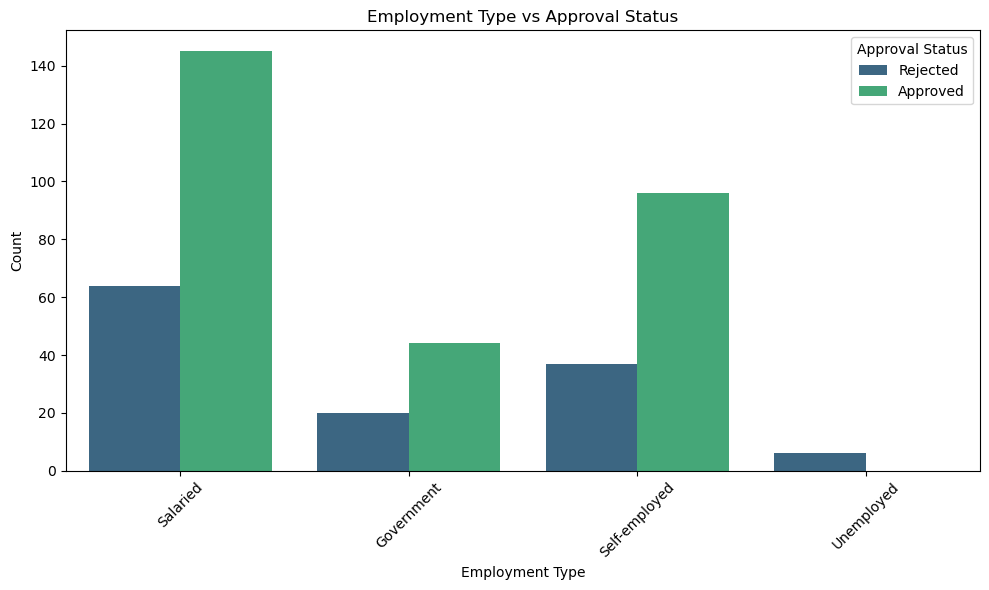

In [13]:
# Step 1: Prepare the Contingency Table
employment_vs_approval = pd.crosstab(df['employment_type'], df['approval_status'])

# Display the contingency table
print("Contingency Table: Employment Type vs Approval Status")
print(employment_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(employment_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=employment_vs_approval.index, columns=employment_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between Employment Type and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between Employment Type and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='employment_type', hue='approval_status', palette='viridis')
plt.title('Employment Type vs Approval Status')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


Contingency Table: income_buckets vs Approval Status
approval_status  Approved  Rejected
income_buckets                     
0-5 Lakhs              37        16
10-15 Lakhs            63        38
15-20 Lakhs            93        34
5-10 Lakhs             92        39

Chi-Square Test Results:
Chi-Square Statistic: 3.246260123354297
P-Value: 0.35519254235191033
Degrees of Freedom: 3

Expected Frequencies Table:
approval_status   Approved   Rejected
income_buckets                       
0-5 Lakhs        36.662621  16.337379
10-15 Lakhs      69.866505  31.133495
15-20 Lakhs      87.851942  39.148058
5-10 Lakhs       90.618932  40.381068

Fail to reject the null hypothesis: There is no significant association between income and Approval Status.


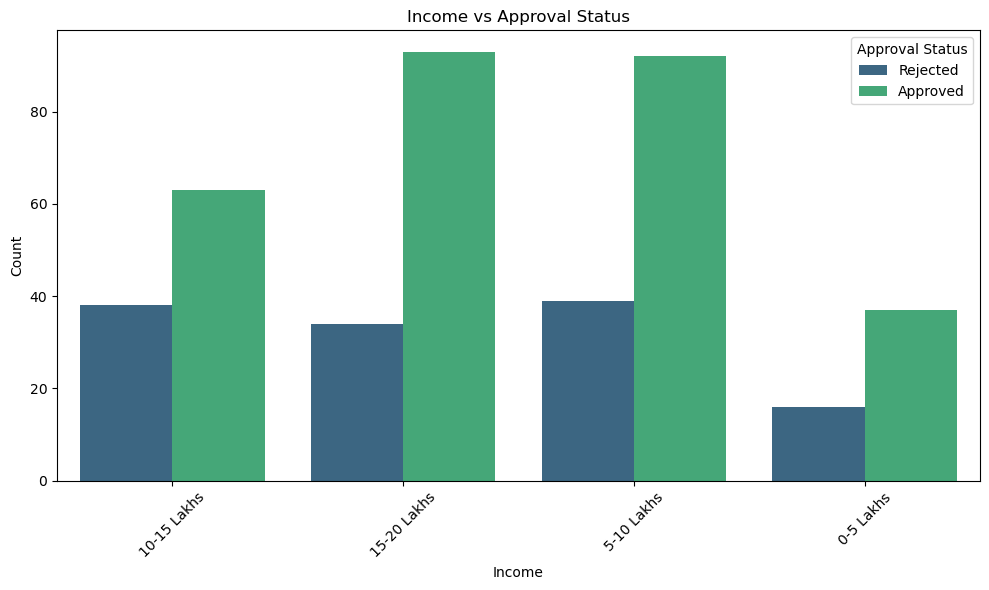

In [14]:
# Step 1: Prepare the Contingency Table
income_vs_approval = pd.crosstab(df['income_buckets'], df['approval_status'])

# Display the contingency table
print("Contingency Table: income_buckets vs Approval Status")
print(income_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(income_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=income_vs_approval.index, columns=income_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between income and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between income and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='income_buckets', hue='approval_status', palette='viridis')
plt.title('Income vs Approval Status')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


Contingency Table: income_buckets vs Approval Status
approval_status  Approved  Rejected
DTI                                
0.0458                  1         0
0.1753                  0         1
0.6119                  0         1
0.8391                  0         1
0.9238                  1         0
...                   ...       ...
155.3477                0         1
159.1605                1         0
160.0140                1         0
174.2103                1         0
194.3940                1         0

[412 rows x 2 columns]

Chi-Square Test Results:
Chi-Square Statistic: 412.00000000000006
P-Value: 0.4768339149280282
Degrees of Freedom: 411

Expected Frequencies Table:
approval_status  Approved  Rejected
DTI                                
0.0458           0.691748  0.308252
0.1753           0.691748  0.308252
0.6119           0.691748  0.308252
0.8391           0.691748  0.308252
0.9238           0.691748  0.308252
...                   ...       ...
155.3477         0.

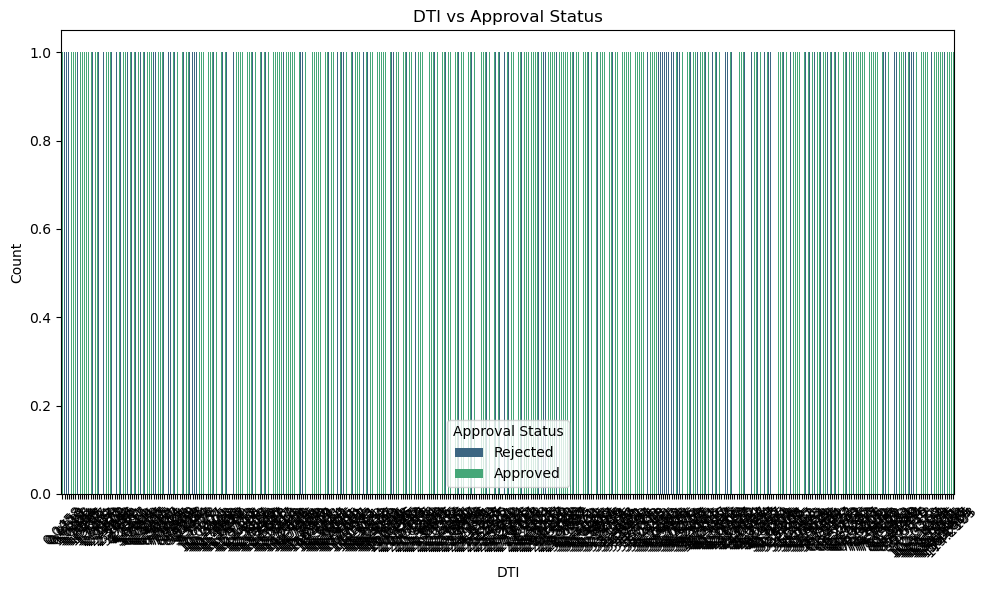

In [15]:
# Step 1: Prepare the Contingency Table
DTI_vs_approval = pd.crosstab(df['DTI'], df['approval_status'])

# Display the contingency table
print("Contingency Table: income_buckets vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(DTI_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=DTI_vs_approval.index, columns=DTI_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between DTI and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between DTI and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DTI', hue='approval_status', palette='viridis')
plt.title('DTI vs Approval Status')
plt.xlabel('DTI')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

Contingency Table: savings vs Approval Status
approval_status  Approved  Rejected
DTI                                
0.0458                  1         0
0.1753                  0         1
0.6119                  0         1
0.8391                  0         1
0.9238                  1         0
...                   ...       ...
155.3477                0         1
159.1605                1         0
160.0140                1         0
174.2103                1         0
194.3940                1         0

[412 rows x 2 columns]

Chi-Square Test Results:
Chi-Square Statistic: 2.1611323540149874
P-Value: 0.7061510448325568
Degrees of Freedom: 4

Expected Frequencies Table:
approval_status   Approved   Rejected
Savings_bins                         
 0-1L            51.881068  23.118932
1L-2L            65.024272  28.975728
2L-3L            61.565534  27.434466
3L-4L            50.497573  22.502427
4L-5L            56.031553  24.968447

Fail to reject the null hypothesis: There is no s

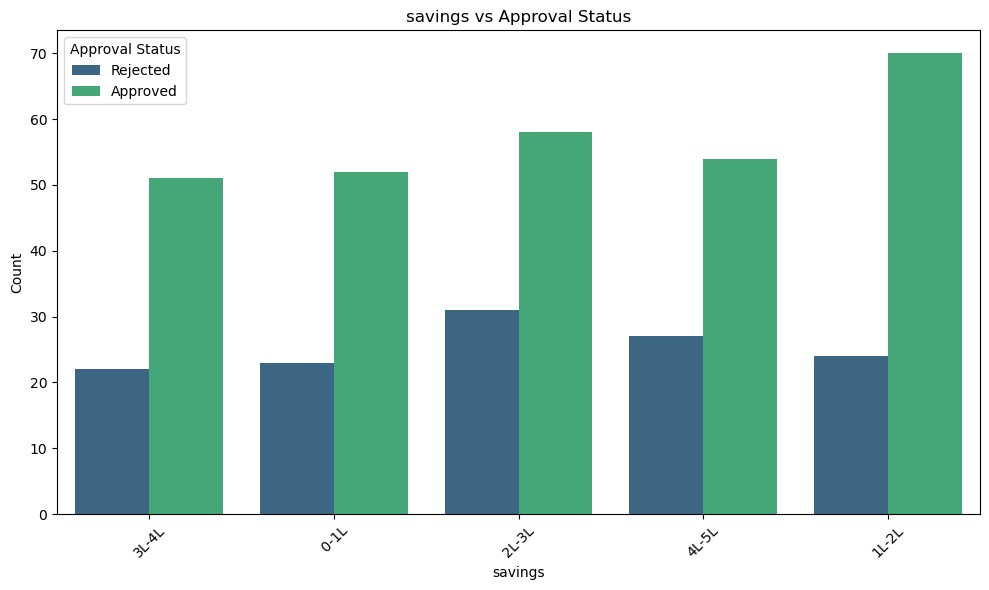

In [16]:
# Step 1: Prepare the Contingency Table
savings_vs_approval = pd.crosstab(df['Savings_bins'], df['approval_status'])

# Display the contingency table
print("Contingency Table: savings vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(savings_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=savings_vs_approval.index, columns=savings_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between savings and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between savings and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Savings_bins', hue='approval_status', palette='viridis')
plt.title('savings vs Approval Status')
plt.xlabel('savings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

Contingency Table: investment vs Approval Status
approval_status  Approved  Rejected
DTI                                
0.0458                  1         0
0.1753                  0         1
0.6119                  0         1
0.8391                  0         1
0.9238                  1         0
...                   ...       ...
155.3477                0         1
159.1605                1         0
160.0140                1         0
174.2103                1         0
194.3940                1         0

[412 rows x 2 columns]

Chi-Square Test Results:
Chi-Square Statistic: 0.7281007419537137
P-Value: 0.9478188482139107
Degrees of Freedom: 4

Expected Frequencies Table:
approval_status   Approved   Rejected
investment_bins                      
 0-2L            53.956311  24.043689
2L-4L            56.031553  24.968447
4L-6L            54.648058  24.351942
6L-8L            50.497573  22.502427
8L-10L           69.866505  31.133495

Fail to reject the null hypothesis: There is n

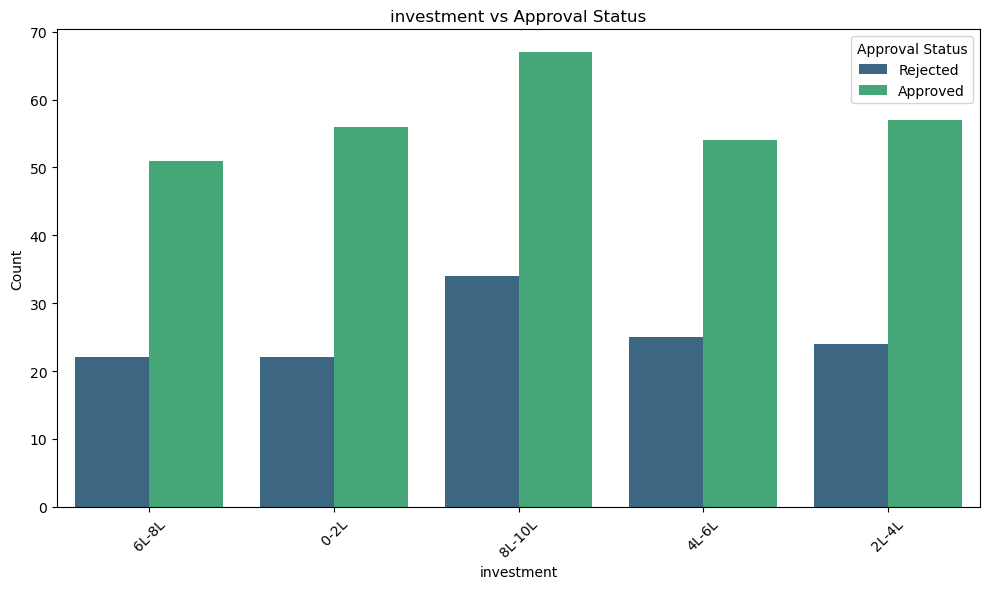

In [17]:
# Step 1: Prepare the Contingency Table
investment_vs_approval = pd.crosstab(df['investment_bins'], df['approval_status'])

# Display the contingency table
print("Contingency Table: investment vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(investment_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=investment_vs_approval.index, columns=investment_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between investment and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between investment and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='investment_bins', hue='approval_status', palette='viridis')
plt.title('investment vs Approval Status')
plt.xlabel('investment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

Contingency Table: investment vs Approval Status
approval_status  Approved  Rejected
DTI                                
0.0458                  1         0
0.1753                  0         1
0.6119                  0         1
0.8391                  0         1
0.9238                  1         0
...                   ...       ...
155.3477                0         1
159.1605                1         0
160.0140                1         0
174.2103                1         0
194.3940                1         0

[412 rows x 2 columns]

Chi-Square Test Results:
Chi-Square Statistic: 0.0
P-Value: 1.0
Degrees of Freedom: 0

Expected Frequencies Table:
approval_status  Approved  Rejected
Loan_bins                          
 0-1Cr              285.0     127.0

Fail to reject the null hypothesis: There is no significant association between loan amount and Approval Status.


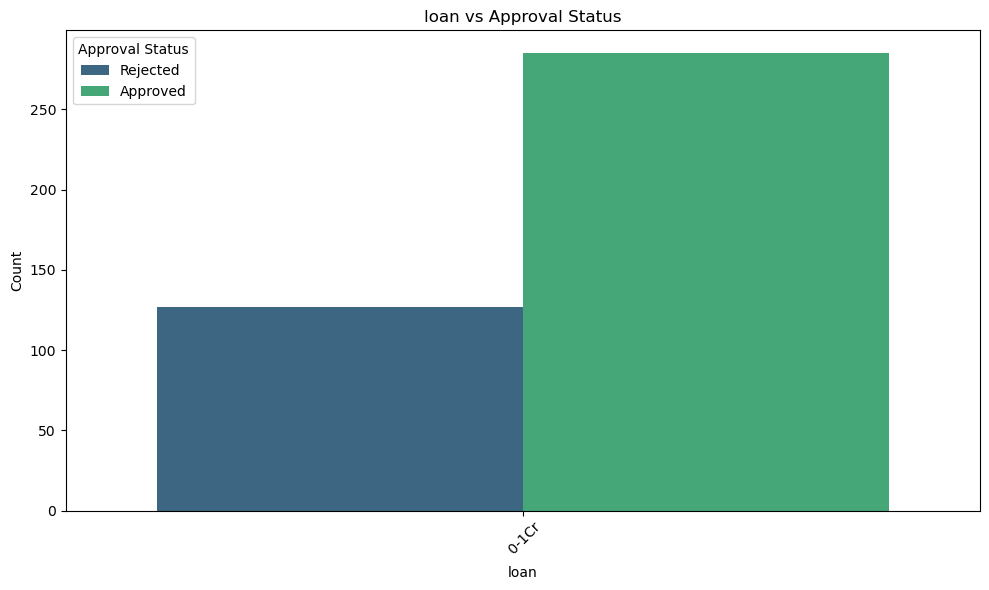

In [18]:
#Loan_bins
# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['Loan_bins'], df['approval_status'])

# Display the contingency table
print("Contingency Table: investment vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between loan amount and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between loan amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Loan_bins', hue='approval_status', palette='viridis')
plt.title('loan vs Approval Status')
plt.xlabel('loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

Contingency Table: previous_loan_experience vs Approval Status
approval_status  Approved  Rejected
DTI                                
0.0458                  1         0
0.1753                  0         1
0.6119                  0         1
0.8391                  0         1
0.9238                  1         0
...                   ...       ...
155.3477                0         1
159.1605                1         0
160.0140                1         0
174.2103                1         0
194.3940                1         0

[412 rows x 2 columns]

Chi-Square Test Results:
Chi-Square Statistic: 0.9966900154094778
P-Value: 0.6075352943833094
Degrees of Freedom: 2

Expected Frequencies Table:
approval_status             Approved   Rejected
previous_loan_experience                       
Negative                   27.669903  12.330097
None                      139.733010  62.266990
Positive                  117.597087  52.402913

Fail to reject the null hypothesis: There is no significan

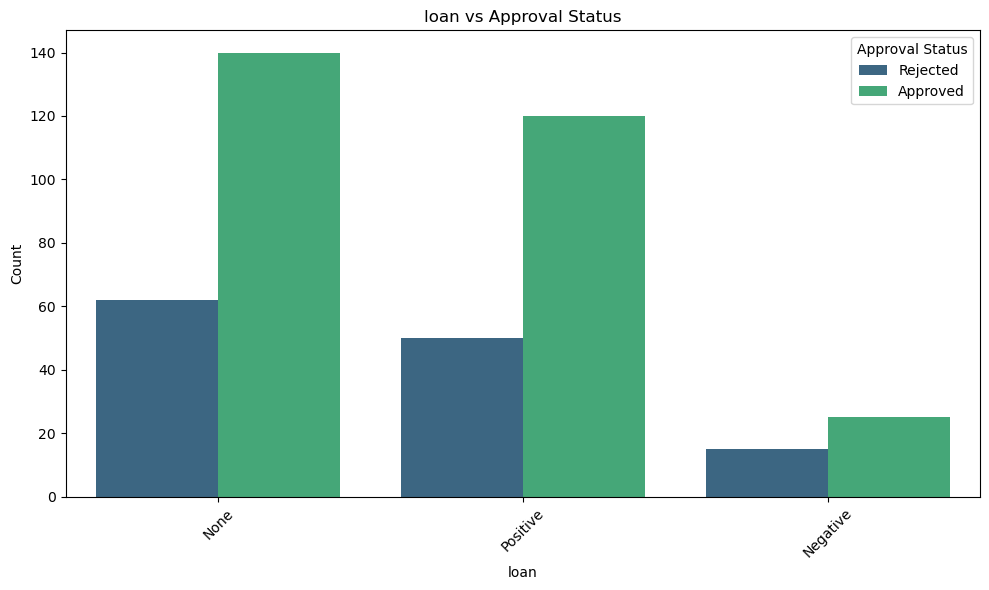

In [19]:

#previous_loan_experience
#Loan_bins
# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['previous_loan_experience'], df['approval_status'])

# Display the contingency table
print("Contingency Table: previous_loan_experience vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between Loan Exp and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between Loan Exp amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='previous_loan_experience', hue='approval_status', palette='viridis')
plt.title('loan vs Approval Status')
plt.xlabel('loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


Contingency Table: cibil_score vs Approval Status
approval_status  Approved  Rejected
cibil_score                        
0                       7         5
301                     0         1
303                     1         0
305                     1         0
308                     0         1
...                   ...       ...
879                     0         1
881                     1         0
890                     0         1
893                     1         2
895                     1         0

[245 rows x 2 columns]

Chi-Square Test Results:
Chi-Square Statistic: 227.14732237417695
P-Value: 0.7736225780362684
Degrees of Freedom: 244

Expected Frequencies Table:
approval_status  Approved  Rejected
cibil_score                        
0                8.300971  3.699029
301              0.691748  0.308252
303              0.691748  0.308252
305              0.691748  0.308252
308              0.691748  0.308252
...                   ...       ...
879              0.691

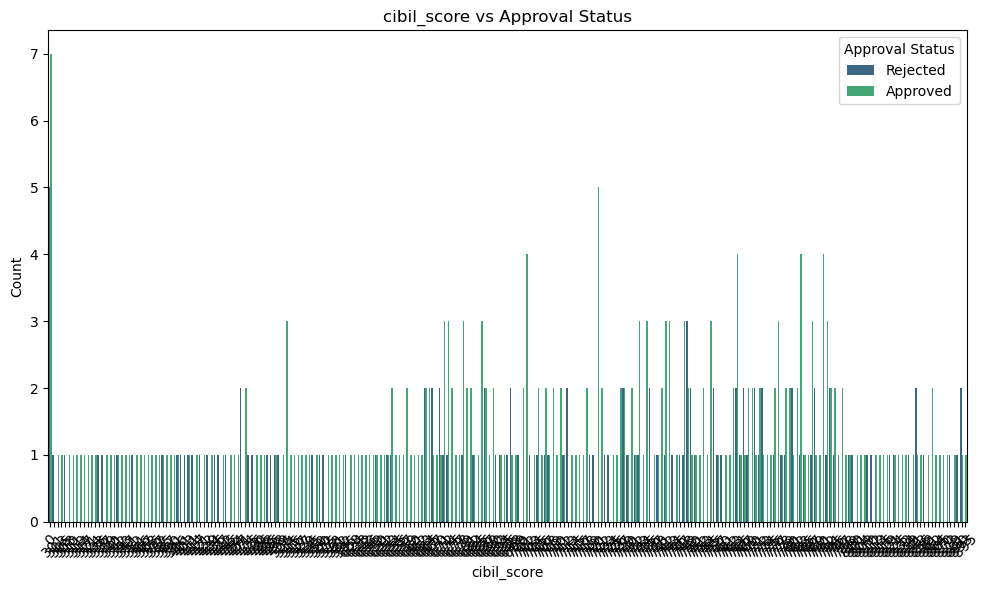

In [20]:
#cibil_score

#previous_loan_experience
#Loan_bins
# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['cibil_score'], df['approval_status'])

# Display the contingency table
print("Contingency Table: cibil_score vs Approval Status")
print(loan_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between cibil_score and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between cibil_score amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cibil_score', hue='approval_status', palette='viridis')
plt.title('cibil_score vs Approval Status')
plt.xlabel('cibil_score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


Contingency Table: term_bins vs Approval Status
approval_status  Approved  Rejected
loan_term_yrs                      
5                      43        20
10                     49        14
15                     43        24
20                     55        18
25                     51        19
30                     44        32

Chi-Square Test Results:
Chi-Square Statistic: 9.278388369062679
P-Value: 0.09846225201291357
Degrees of Freedom: 5

Expected Frequencies Table:
approval_status   Approved   Rejected
loan_term_yrs                        
5                43.580097  19.419903
10               43.580097  19.419903
15               46.347087  20.652913
20               50.497573  22.502427
25               48.422330  21.577670
30               52.572816  23.427184

Fail to reject the null hypothesis: There is no significant association between term_bins amount and Approval Status.


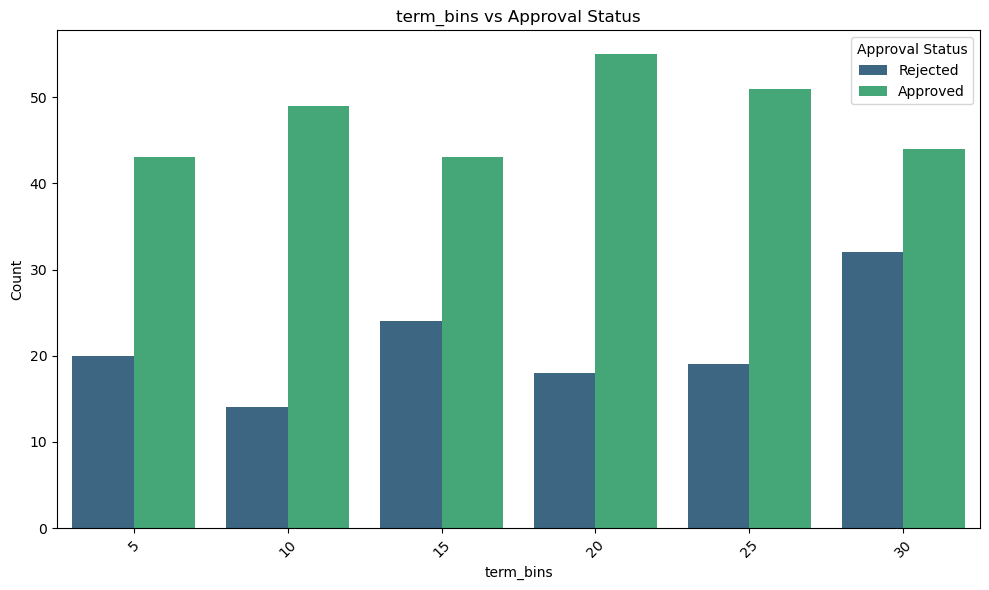

In [21]:

#term_bins

# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['loan_term_yrs'], df['approval_status'])

# Display the contingency table
print("Contingency Table: term_bins vs Approval Status")
print(loan_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between term_bins and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between term_bins amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_term_yrs', hue='approval_status', palette='viridis')
plt.title('term_bins vs Approval Status')
plt.xlabel('term_bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate data for approved and rejected applicants
approved_df = df[df['approval_status'] == 'Approved']
rejected_df = df[df['approval_status'] == 'Rejected']

# Define a function to conduct a Two-Sample T-Test for a given feature
def conduct_ttest(feature):
    approved_values = approved_df[feature].dropna()  # Drop missing values if any
    rejected_values = rejected_df[feature].dropna()  # Drop missing values if any

    # Perform the Two-Sample T-Test
    t_stat, p_value = ttest_ind(approved_values, rejected_values)

    # Print the results
    print(f"\nTwo-Sample T-Test for {feature}:")
    print(f"T-Statistic: {t_stat}")
    print(f"P-Value: {p_value}")
    
    # Interpret the results
    if p_value < 0.05:
        print(f"Reject the null hypothesis: There is a significant difference in the mean {feature} between approved and rejected applications.")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant difference in the mean {feature} between approved and rejected applications.")

# Perform T-Tests for each feature
features_to_analyze = ['DTI', 'MonthlySalary', 'investment_portfolio_value','cibil_score']
for feature in features_to_analyze:
    conduct_ttest(feature)



Two-Sample T-Test for DTI:
T-Statistic: 0.42519277843036324
P-Value: 0.6709192187684324
Fail to reject the null hypothesis: There is no significant difference in the mean DTI between approved and rejected applications.

Two-Sample T-Test for MonthlySalary:
T-Statistic: 0.12608515254514369
P-Value: 0.8997263252315535
Fail to reject the null hypothesis: There is no significant difference in the mean MonthlySalary between approved and rejected applications.

Two-Sample T-Test for investment_portfolio_value:
T-Statistic: -0.9184732331340429
P-Value: 0.3589111672474016
Fail to reject the null hypothesis: There is no significant difference in the mean investment_portfolio_value between approved and rejected applications.

Two-Sample T-Test for cibil_score:
T-Statistic: 0.3638105160694662
P-Value: 0.7161870374637347
Fail to reject the null hypothesis: There is no significant difference in the mean cibil_score between approved and rejected applications.


In [23]:
import pandas as pd
from scipy.stats import f_oneway


# Define a function to conduct One-Way ANOVA for a given numeric feature and categorical group
def conduct_anova(feature, group_by):
    # Group the data by the categorical variable and collect the feature values in each group
    unique_groups = df[group_by].unique()
    groups_data = [df[df[group_by] == group][feature].dropna() for group in unique_groups]

    # Perform One-Way ANOVA
    f_stat, p_value = f_oneway(*groups_data)

    # Print the results
    print(f"\nOne-Way ANOVA for {feature} by {group_by}:")
    print(f"F-Statistic: {f_stat}")
    print(f"P-Value: {p_value}")

    # Interpret the results
    if p_value < 0.05:
        print(f"Reject the null hypothesis: There is a significant difference in the mean {feature} between different {group_by} categories.")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant difference in the mean {feature} between different {group_by} categories.")

# Perform ANOVA for Loan Amount vs. Employment Type
conduct_anova('loan_amount', 'employment_type')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'income_buckets')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'cibil_score')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'previous_loan_experience')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'Savings_bins')





One-Way ANOVA for loan_amount by employment_type:
F-Statistic: 1.0371059950314225
P-Value: 0.37596990192156327
Fail to reject the null hypothesis: There is no significant difference in the mean loan_amount between different employment_type categories.

One-Way ANOVA for DTI by income_buckets:
F-Statistic: 88.25559151739294
P-Value: 4.983081252749792e-44
Reject the null hypothesis: There is a significant difference in the mean DTI between different income_buckets categories.

One-Way ANOVA for DTI by cibil_score:
F-Statistic: 1.4734039482866996
P-Value: 0.003723089589721278
Reject the null hypothesis: There is a significant difference in the mean DTI between different cibil_score categories.

One-Way ANOVA for DTI by previous_loan_experience:
F-Statistic: 0.25754795794036733
P-Value: 0.7730698164783637
Fail to reject the null hypothesis: There is no significant difference in the mean DTI between different previous_loan_experience categories.

One-Way ANOVA for DTI by Savings_bins:
F-St